In [16]:
# assignment3
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
scalerStandard.fit(X)
X_scaled=scalerStandard.transform(X)
display(X_scaled.shape)
OrigX=X
X=X_scaled

(1151, 19)

(1151, 19)

In [5]:
from collections import defaultdict
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.metrics.pairwise import pairwise_distances
from itertools import product
def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]


tmp = defaultdict(dict)
for i,dim in product(range(1,10),range(1,20)):
    rp = SparseRandomProjection(random_state=i, n_components=dim)
    tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
tmp =pd.DataFrame(tmp).T
display(tmp)
corr=tmp.mean(axis=1)

,1,2,3,4,5,6,7,8,9
1,0.485390,0.843818,0.562470,0.512775,0.657786,0.227102,0.316311,0.468190,0.428859
2,0.737732,0.881444,0.659178,0.787221,0.793080,0.556686,0.686577,0.797313,0.584383
3,0.768695,0.853400,0.762964,0.798439,0.833005,0.692125,0.541698,0.777925,0.734194
4,0.825310,0.896988,0.739339,0.890240,0.869805,0.807236,0.854296,0.894908,0.744662
5,0.867813,0.952425,0.803411,0.917967,0.868660,0.891883,0.823586,0.849954,0.791553
6,0.900850,0.918544,0.864033,0.759967,0.913335,0.847225,0.769173,0.865775,0.786940
7,0.880197,0.943536,0.901221,0.892755,0.901075,0.808181,0.861744,0.918872,0.804431
8,0.926188,0.959267,0.926237,0.908375,0.946728,0.804947,0.918100,0.931199,0.846233
9,0.949268,0.932363,0.902072,0.858237,0.925103,0.877805,0.919711,0.961287,0.919525
10,0.902205,0.912916,0.922397,0.909939,0.923358,0.855189,0.932265,0.956368,0.937599


In [8]:
from sklearn.base import TransformerMixin,BaseEstimator
import scipy.sparse as sps
from scipy.linalg import pinv
def reconstructionError(projections,X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed=np.matmul(np.matmul(p,W),X.T)
    reconstructed=reconstructed.T
    #reconstructed = ((p*W)*(X.T)).T # Unproject projected data
    errors = np.square(X-reconstructed)
    return np.nanmean(errors)

tmp = defaultdict(dict)
for i,dim in product(range(10),range(1,20)):
    rp = SparseRandomProjection(random_state=i, n_components=dim)
    rp.fit(X)  
    tmp[dim][i] = reconstructionError(rp, X)
tmp =pd.DataFrame(tmp).T
error=tmp.mean(axis=1)
print(error)

1     0.954125
2     0.867690
3     0.840206
4     0.805133
5     0.727721
6     0.686196
7     0.581187
8     0.539274
9     0.540355
10    0.457188
11    0.427124
12    0.346597
13    0.358454
14    0.263726
15    0.241488
16    0.169965
17    0.111397
18    0.066204
19    0.008938
dtype: float64


In [28]:
#corr=tmp.mean(axis=1)

Text(0.5,1,u'Diabetes RP distance preservation&reconstruction error')

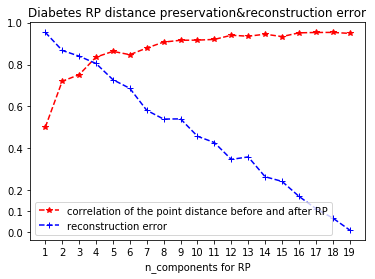

In [9]:
plt.plot(range(1,20),corr,'--r*' )
plt.plot(range(1,20), error,'--b+')
plt.legend(['correlation of the point distance before and after RP', 'reconstruction error'])
plt.xticks(range(1,20))
plt.yticks([0,0.1,0.2,0.4,0.6,0.8,1])
plt.xlabel('n_components for RP')
plt.title('Diabetes RP distance preservation&reconstruction error')

[0.5491329479768786,
 0.5751445086705202,
 0.5433526011560693,
 0.5433526011560693,
 0.5867052023121387,
 0.6069364161849711,
 0.5953757225433526,
 0.6329479768786127,
 0.6705202312138728,
 0.6127167630057804,
 0.6763005780346821,
 0.6473988439306358,
 0.6560693641618497,
 0.6502890173410405,
 0.6589595375722543,
 0.6329479768786127,
 0.630057803468208,
 0.6445086705202312,
 0.653179190751445]

(1151,)

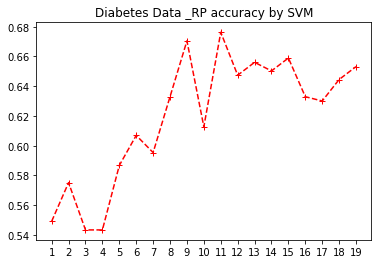

In [8]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
score=[]
for n_component in range(1,20):
        rp = SparseRandomProjection(random_state=6, n_components=n_component)
        X_RP=rp.fit_transform(X)
        #pca.fit(X)
        #X_PCA=pca.transform(X)
        X_train, X_test, Y_train, Y_test = train_test_split(X_RP, Y, stratify=Y, test_size=0.3, random_state=0)
        clf =SVC(C=3000, gamma=0.1, kernel='rbf')
        clf.fit(X_train, Y_train)        
        score.append(clf.score(X_test,Y_test))
        
display(score)
plt.plot(range(1,20),score,'--r+')
plt.xticks(range(1,20))
plt.title("Diabetes Data _RP accuracy by SVM")
display(Y.shape)

In [10]:
dim=17
rp = SparseRandomProjection(random_state=6, n_components=dim)
X_RP=rp.fit_transform(X)

Automatically created module for IPython interactive environment
next


No handlers could be found for logger "matplotlib.legend"


array([ 53567.1168323 ,  46586.9017937 ,  36937.81763089,  35650.29721181,
        33856.362983  ,  33475.54419411,  30762.97588726,  31250.02846847,
        29368.20783716,  29369.43344161,  28592.07992672,  27927.66069583,
        27760.08004664,  27013.17325993,  27330.08244593,  26079.64959286,
        26487.41587768,  25511.71698233,  25449.1320357 ,   3131.95341683,
         2893.95161516,   1804.06381763,   1098.37739286,    971.77105052,
       -12171.50637409, -13107.69283072, -16333.22280498, -13060.85952407,
       -18908.23260889, -18954.59914524, -20464.78179065, -20258.53283841,
       -20461.37935773, -16442.88996612, -16607.74422218, -18970.32578208,
       -18011.8221587 , -18433.625348  ,  48381.2578681 ,  39863.96179921,
        30281.94878679,  26344.21143544,  25982.79037107,  25638.51135954,
        22170.00366899,  20993.62869661,  19665.25349247,  19463.73673272,
        19924.07040489,  19533.10637498,  17410.79872639,  17959.73863078,
        17569.49732522,  

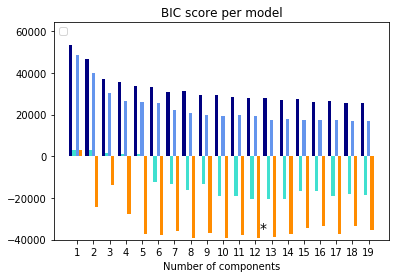

In [70]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_RP)
        bic.append(gmm.bic(X_RP))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()*1.2])
#plt.ylim(-40000,80000)

plt.legend( loc=2)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
#spl.legend([b[0] for b in bars], cv_types, bbox_to_anchor=(0., 1.02, 1., .102), loc=9,ncol=4, mode="expand", borderaxespad=0.)
#spl.legend([b[0] for b in bars], cv_types,ncol=2)
plt.title('BIC score per model')
print('next')
# Plot the winner
display(bic)

[-9.003612655938428,
 -5.72702145602852,
 -2.4499775807384943,
 -1.1106049426525741,
 1.1978049111690725,
 1.5326656463225548]

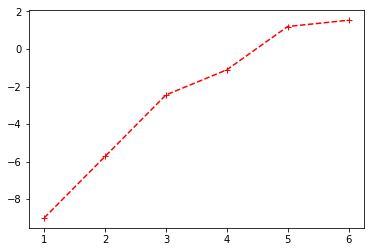

In [10]:
#fits EM model
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
score=[]
for n_components in range(1,7):
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type='full')
        gmm.fit(X_RP)
        score.append(gmm.score(X_RP, y=None))
display(score)
plt.plot(range(1,7),score,'--r+')

[0.3414256657833237,
 0.04360931360216666,
 0.10825953393828185,
 0.07144377022104106,
 0.028923858223275388]

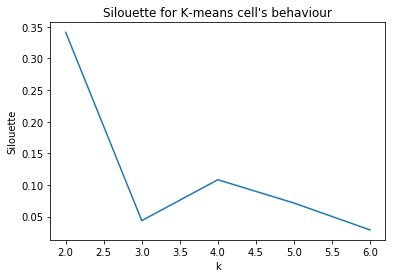

In [11]:
#silhousette after RP
from sklearn.metrics import silhouette_score
s = []
for n_components in range(2,7):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(X_RP)
    labels = gmm.predict(X_RP)
    s.append(silhouette_score(X_RP, labels, metric='euclidean'))
display(s)
plt.plot(range(2,7),s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
plt.show()

In [1]:
#

In [66]:
#

Homogeneity for 12 cluster: 0.120 
mutual index for 12 cluster: 0.044 
completnenss for 12 cluster: 0.047 


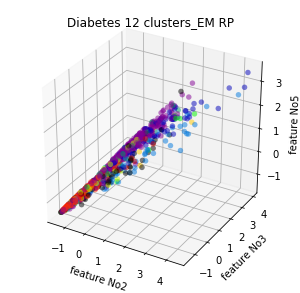

In [17]:

fig = plt.figure(figsize=(5, 5))
ax1=fig.add_subplot(111,projection='3d')
gmm = mixture.GaussianMixture(n_components=12, covariance_type='full',random_state=2)
gmm.fit(X_RP)
cluster_labels = gmm.predict(X_RP)
colors = cm.spectral(cluster_labels.astype(float) / 12)
ax1.scatter(X[:, 2], X[:, 3],X[:,5],s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')  

 
ax1.set_xlabel('feature No2 ')
ax1.set_ylabel('feature No3')
ax1.set_zlabel('feature No5')
ax1.set_title('Diabetes 12 clusters_EM RP')
 
print("Homogeneity for 12 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 12 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 12 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))

In [20]:
#

In [2]:
#

Homogeneity for 2 cluster: 0.012 
mutual index for 2 cluster: 0.011 
completnenss for 2 cluster: 0.012 


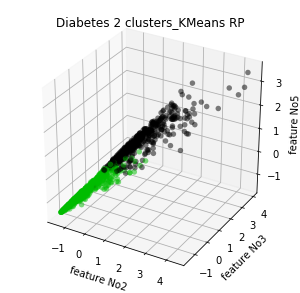

In [19]:
clusterer = KMeans(n_clusters=2,random_state=12,init='k-means++')
clusterer.fit(X_RP)
cluster_labels = clusterer.predict(X_RP)
colors = cm.spectral(cluster_labels.astype(float) /2)
fig = plt.figure(figsize=(5, 5))
ax1=fig.add_subplot(111,projection='3d') 
ax1.scatter(X[:, 2], X[:, 3],X[:,5], s=30,lw=0, alpha=0.5,
                c=colors, edgecolor='K');
ax1.set_xlabel('feature No2 ')
ax1.set_ylabel('feature No3')
ax1.set_zlabel('feature No5')
ax1.set_title('Diabetes 2 clusters_KMeans RP')
print("Homogeneity for 2 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 2 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 2 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))

In [75]:
#